**autors: Mehrin Azan & Clarissa Auckenthaler**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt

#from labellines import labelLines

In [2]:
# prepare dataset
#load production crops livestock data from europe
food= pd.read_csv("Production_Crops_Livestock_E_Europe_NOFLAG.csv")
#load area data 
europe= pd.read_csv("https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv")
#select interesting coloumns
project_data=food[['Area Code','Area','Item Code','Item','Element Code','Element','Unit','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020']]
#drop rows with nan value
project_data= project_data.dropna()
#change Area names
project_data.loc[project_data["Area"] == "United Kingdom of Great Britain and Northern Ireland","Area"] = 'United Kingdom'
project_data.loc[project_data["Area"] == "Czechia","Area"] = 'Czech Republic'
project_data.loc[project_data["Area"] == "Faroe Islands","Area"] = 'Faroe Is.'
project_data.loc[project_data["Area"] == "Republic of Moldova","Area"] = 'Moldova'

#drop columns
europe.drop(labels=['zoom','abbreviation','ISO alpha 2','ISO alpha 3','ISO numeric','population','latitude','longitude','continent'], axis=1, inplace=True)
#change column name 
europe.rename(columns = {'name':'Area'}, inplace = True)
#change area name
europe.loc[europe["Area"] == 'Macedonia',"Area"] = 'North Macedonia'

#enter missing value
europe.loc[len(europe.index)] = ['Russian Federation', 3969100.00 ]

#  Percentage overall Area harvested for each country in Europe

In [3]:
#generate the dataset for procentage of use area per country
area= project_data.loc[project_data['Element Code'] == 5312.0]

In [4]:
#generate list for countries and years
country_list = list(area.Area)
country_list = list(set(country_list))
country_list.sort()
year_list = list(area)
year_list.remove('Area Code')
year_list.remove('Area')
year_list.remove('Item Code')
year_list.remove('Item')
year_list.remove('Element Code')
year_list.remove('Element')
year_list.remove('Unit')

In [5]:
d= []

for j in range (len(country_list)):
    for i in range (len(year_list)):
        year= 2000+i
        country= country_list[j]
        #overall sum of area harvested for each country in each year start 2000
        x=area.loc[area['Area'] == country,year_list[i]].sum()/100
        #save as a list
        d.append((country_list[j],year,x))
        
#transform to df       
area_overall_harvested= pd.DataFrame(d, columns=('Area', 'Year', 'Sum Area Harvested'))

#merge with europe area data
area_overall_harvested= pd.merge(area_overall_harvested,europe, on="Area",how='inner')

#calculate procental usage of area for harvesting
area_overall_harvested['procental area usage']= (area_overall_harvested['Sum Area Harvested']/area_overall_harvested['land area km']*100).round(2)

#transform to datetime
area_overall_harvested['Year']= pd.to_datetime(area_overall_harvested['Year'], format= '%Y')

In [6]:
#display outlayers over 100% 
#area_overall_harvested.loc[area_overall_harvested['procental area usage']> 100]

In [7]:
colors ={'Poland':'#00FFFF',
         'Norway': '#7FFFD4',
         'Czech Republic':'#069AF3',
         'Iceland':'#E6DAA6',
         'Romania':'#A52A2A',
         'Malta':'#7FFF00',
         'Germany':'#D2691E',
         'Slovakia':'#FC5A50',
         'Ukraine':'#000000',
         'Faroe Is.':'#FF7F50',
         'North Macedonia':'#00008B',
         'United Kingdom':'#FF00FF',
         'Latvia':'#FAC205',
         'Portugal':'#15B01A',
         'Bosnia and Herzegovina':'#4B0082',
         'Finland':'#C79FEF',
         'Luxembourg':'#7BC8F6',
         'Denmark':'#C20078',
         'Russian Federation':'#F97306',
         'Lithuania':'#FFC0CB',
         'Hungary':'#580F41',
         'Ireland':'#FF0000',
         'Switzerland':'#A9561E',
         'Bulgaria':'#D1B26F',
         'Belgium':'#008080',
         'Greece':'#9A0EEA',
         'Italy':'#FFFF00',
         'Belarus':'#9ACD32',
         'Spain':'#06C2AC',
         'Slovenia':'#653700',
         'Moldova':'#AAA662',
         'Sweden':'#FF81C0',
         'Estonia':'#BBF90F',
         'Albania':'#FF81C0',
         'Austria':'#808080',
         'Croatia':'#ADD8E6',
         'Netherlands':'#FFA500',
         'France':'#01153E'}

Text(0, 0.5, 'Percent[%]')

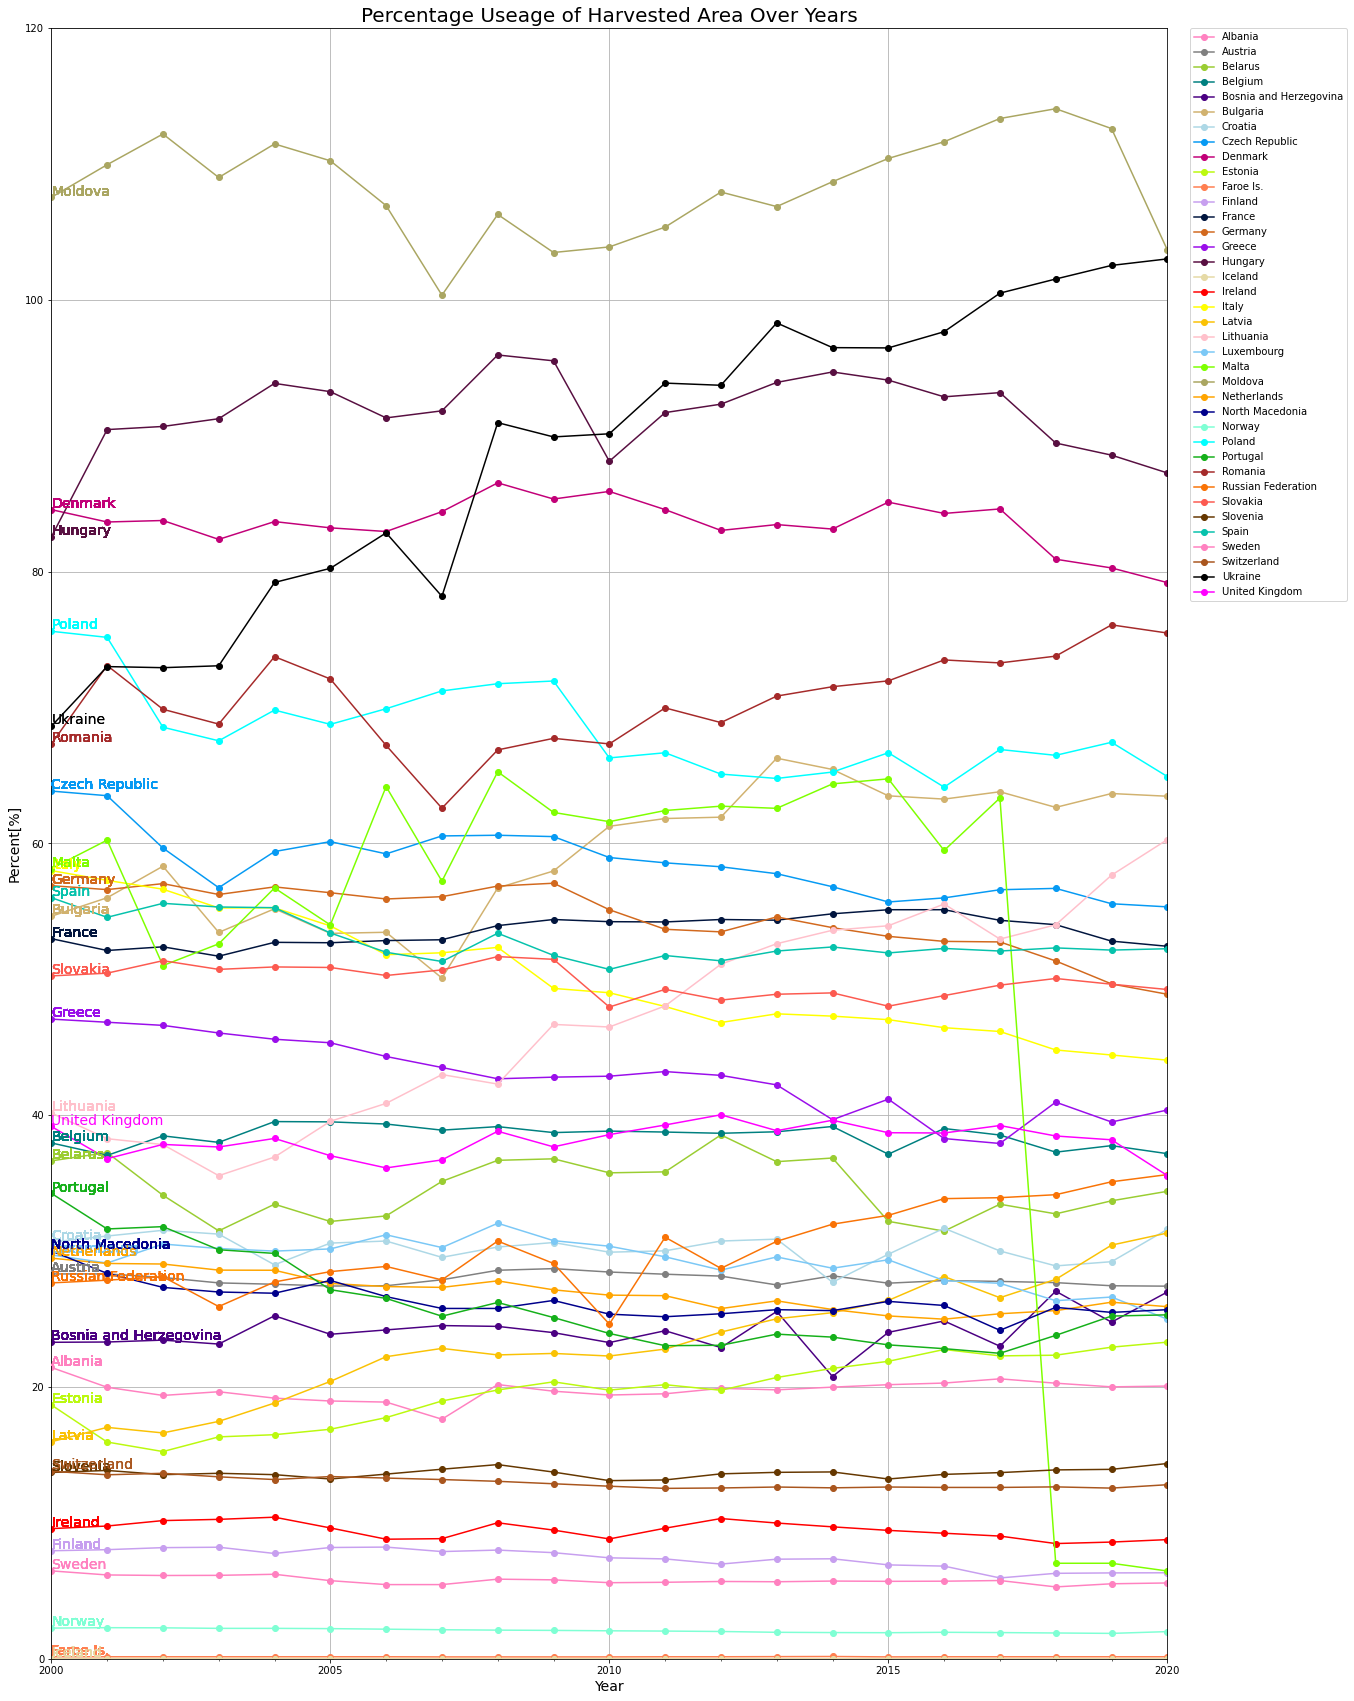

In [8]:
# plot percentage of used area for harvesting
fig, ax = plt.subplots(figsize=(20,30))
for name, group in area_overall_harvested.groupby('Area'):
    #print(group)
    group.plot(x='Year', y='procental area usage',ax=ax,label=name, grid= True, marker='o', color= colors[name])
    ax.set_ylim(bottom=0, top=120)
    
    for line, name in zip(ax.lines, country_list):
        y = line.get_ydata()[0]
        ax.annotate(name, xy=(0, y), xytext=(0, 6),
                  color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                  textcoords="offset points", size=14, va="center")
#legend position
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Percentage Useage of Harvested Area Over Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent[%]', fontsize=14)

## countries of interest 

In [9]:
countries_of_interest= area_overall_harvested.loc[area_overall_harvested.Area.isin(["Ukraine","Germany", "Moldova", "Malta", "Romania", "Hungary" ])] 

In [10]:
c_of_interest= ["Ukraine","Germany", "Moldova", "Malta", "Romania", "Hungary" ]
c_of_interest.sort()

In [11]:
c ={     'Romania':'tab:green',
         'Malta':'tab:pink',
         'Germany':'tab:red',
         
         'Ukraine':'tab:orange',
         
         'Hungary':'tab:purple',
         
         'Moldova':'tab:blue'}

Text(0, 0.5, 'Percent[%]')

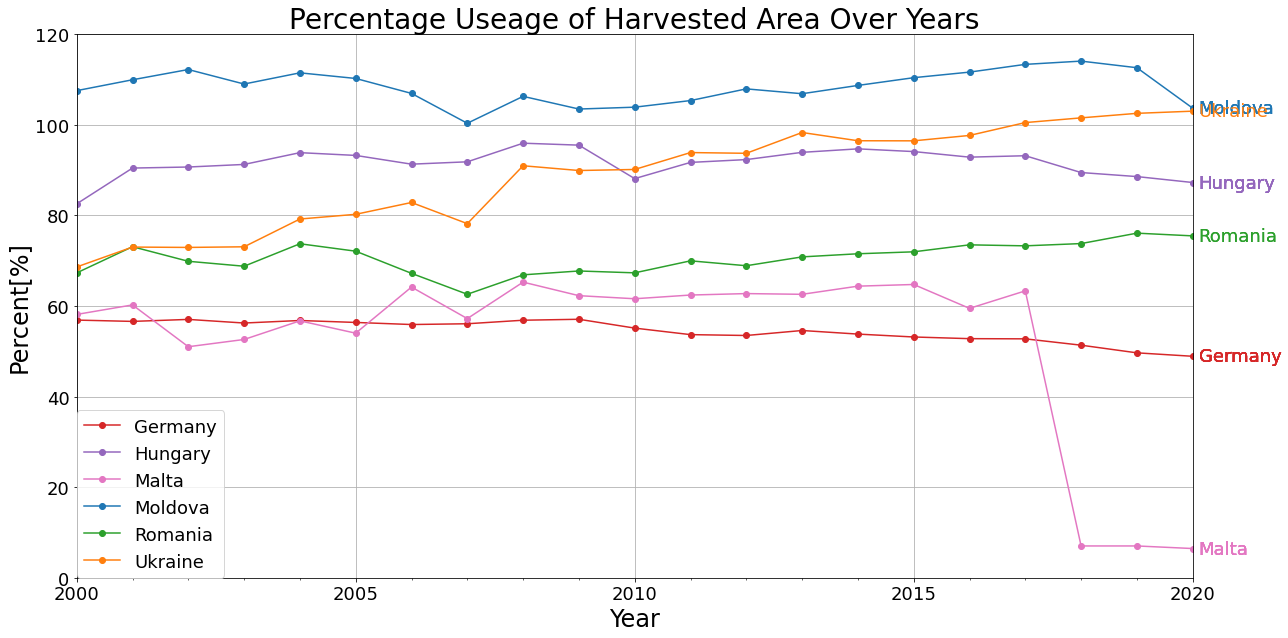

In [72]:
# plot countries of interest
fig, ax = plt.subplots(figsize=(20,10))
for name, group in countries_of_interest.groupby('Area'):
    #print(group)
    group.plot(x='Year', y='procental area usage',ax=ax,label=name, grid= True, marker='o', color= c[name])
    ax.set_ylim(bottom=0, top=120)
    ax.tick_params(axis = 'both', labelsize = 18)
    
    for line, name in zip(ax.lines, c_of_interest):
        y = line.get_ydata()[-1]
        ax.annotate(name, xy=(1, y), xytext=(6, 0),
                  color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                  textcoords="offset points", size=18, va="center")
#legend position
plt.legend(loc='lower left', borderaxespad=0,fontsize=18)
plt.title('Percentage Useage of Harvested Area Over Years', fontsize=28)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Percent[%]', fontsize=24)

<AxesSubplot:ylabel='Area'>

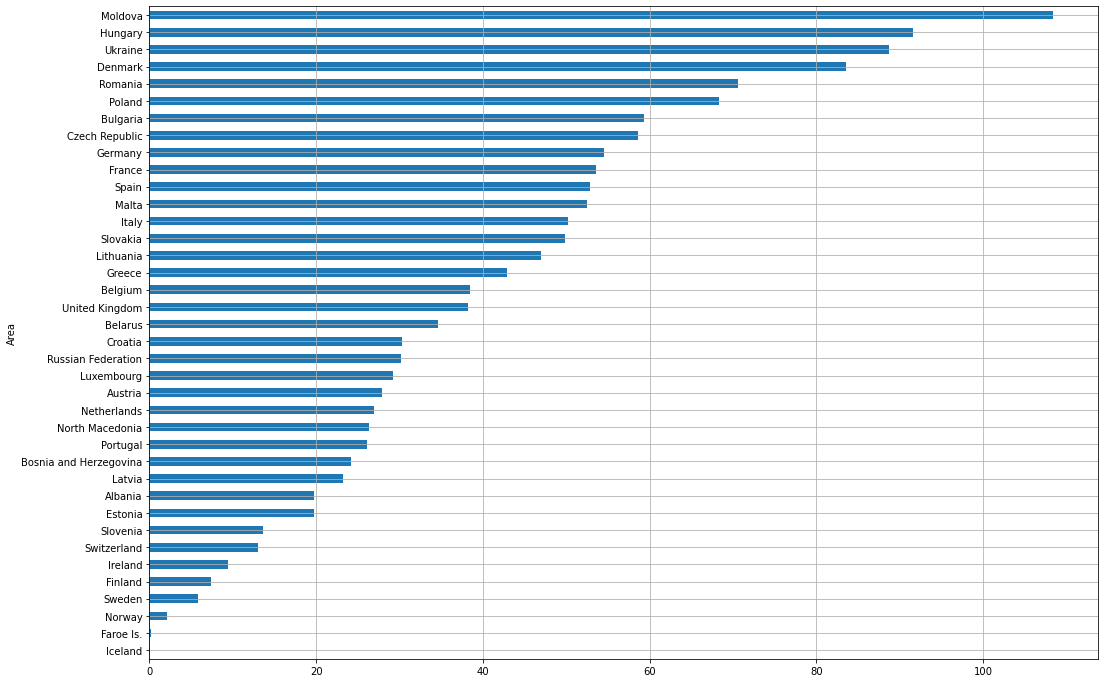

In [18]:
#average plot
area_overall_harvested.groupby('Area')['procental area usage'].mean().sort_values().plot(kind='barh', figsize=(17, 12), grid= True)

# Most produced commodities, Europe (Total)

In [19]:
production= project_data.loc[project_data['Element Code'] == 5510]
production
production_counts = production.groupby(["Item"])['Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020'].sum()
# new column average over the years
df = production_counts.eval('Average = (Y2000+Y2001+Y2002+Y2003+Y2004+Y2005+Y2006+Y2007+Y2008+Y2009+Y2010+Y2011+Y2012+Y2013+Y2014+Y2015+Y2016+Y2017+Y2018+Y2019+Y2020)/21')
df['Average'].round(2)
df= df.sort_values(by='Average', ascending=False)

# take top 6, remove 'milk, whole fresh cow' as it should already be included in 'milk, total', leaving top 5
# remove 'sugar beet' as it is included in 'sugar crops, primary'
top_5_production_counts= df.head(7)
top_5_production_counts=top_5_production_counts.reset_index()
top_5_production_counts=top_5_production_counts.drop([3,5])
top_5_production_counts=top_5_production_counts.reset_index()
top_5_production_counts

<ipython-input-19-966e49937a42>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  production_counts = production.groupby(["Item"])['Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020'].sum()


,index,Item,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Average
0,0,"Cereals, Total",379060984.0,421621164.0,427786761.0,357801396.0,459852941.0,417938999.0,395558279.0,387637326.0,...,414328456.0,476771581.0,516669531.0,495393144.0,500581917.0,519178105.0,487785942.0,532651764.0,514959052.0,4.530494e+08
1,1,Wheat,181434043.0,199215239.0,209361967.0,160409344.0,216995408.0,206309719.0,189838618.0,187837714.0,...,192646126.0,223411207.0,246864516.0,255031087.0,249269894.0,270103192.0,239243278.0,263599573.0,252143243.0,2.208764e+08
2,2,"Milk, Total",211338268.0,212402787.0,214093030.0,213700385.0,210902619.0,211365098.0,210941180.0,210628803.0,...,213878432.0,214271824.0,220464740.0,223494448.0,223193091.0,225519126.0,228192107.0,230041308.0,232608772.0,2.168884e+08
3,4,Sugar Crops Primary,168853405.0,158956844.0,177122890.0,159208369.0,177812653.0,178645403.0,171773896.0,168001984.0,...,185621380.0,166232415.0,187892000.0,155977797.0,185601253.0,217360355.0,182378936.0,192476954.0,155073182.0,1.734801e+08
4,6,"Roots and Tubers, Total",143613499.0,130901149.0,125218982.0,122191469.0,131937441.0,120588360.0,115238717.0,120817000.0,...,116169000.0,114725933.0,124091484.0,116048678.0,108551125.0,114619676.0,104281624.0,106524878.0,106997220.0,1.191756e+08


In [20]:
#filter project data for top5 produced commodities
x= project_data.loc[((production['Item'] == 'Cereals, Total') | 
                       (project_data['Item'] == 'Wheat') | 
                       (project_data['Item'] == 'Milk, Total') | 
                      # (project_data['Item'] == 'Milk, whole fresh cow') | 
                       (project_data['Item'] == 'Sugar Crops Primary') |
                       #(project_data['Item'] == 'Sugar beet') 
                       (project_data['Item'] == 'Roots and Tubers, Total')
                       )] 
                       #(project_data['Item'] == 'Roots and Tubers, Total') |
                       #(project_data['Item'] == 'Potatoes')|
                       #(project_data['Item'] == 'Maize')|
                       #(project_data['Item'] == 'Barley')

In [21]:
x= x.groupby(['Item','Element Code','Element'])['Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020'].sum()
x= x.reset_index()

<ipython-input-21-14a5300a588d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x= x.groupby(['Item','Element Code','Element'])['Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020'].sum()


In [22]:
prod_x =x.loc[x['Element Code'] == 5510]

In [23]:
commodities = list(prod_x.Item)
print(commodities)
years = list(prod_x)
years.remove('Element Code')
years.remove('Item')
years.remove('Element')
print(years)

['Cereals, Total', 'Milk, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary', 'Wheat']
['Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020']


In [24]:
e= []

for j in range (len(commodities)):
    for i in range (len(years)):
        year= 2000+i
        commodi= commodities[j]
        #overall sum of area harvested for each country in each year start 2000
        u=prod_x.loc[prod_x['Item'] == commodi,years[i]].sum()
        #save as a list
        e.append(( commodities[j],year,u))
#transform to df       
production_commodities= pd.DataFrame(e, columns=('Item', 'Year', 'Production_Europe'))
#transform to datetime
production_commodities['Year']= pd.to_datetime(production_commodities['Year'], format= '%Y')


In [25]:
colors ={'Cereals, Total':'#440154',
         #'Maize': '#482475',
         'Milk, Total':'#414487',
         #'Milk, whole fresh cow':'#355f8d',
         #'Potatoes':'#2a788e',
         'Roots and Tubers, Total':'#21918c',
         'Sugar Crops Primary':'#22a884',
         #'Sugar beet':'#44bf70',
         'Wheat':'#7ad151',
         #'Barley':'#bddf26'
         }

Text(0, 0.5, 'Production Tonnes')

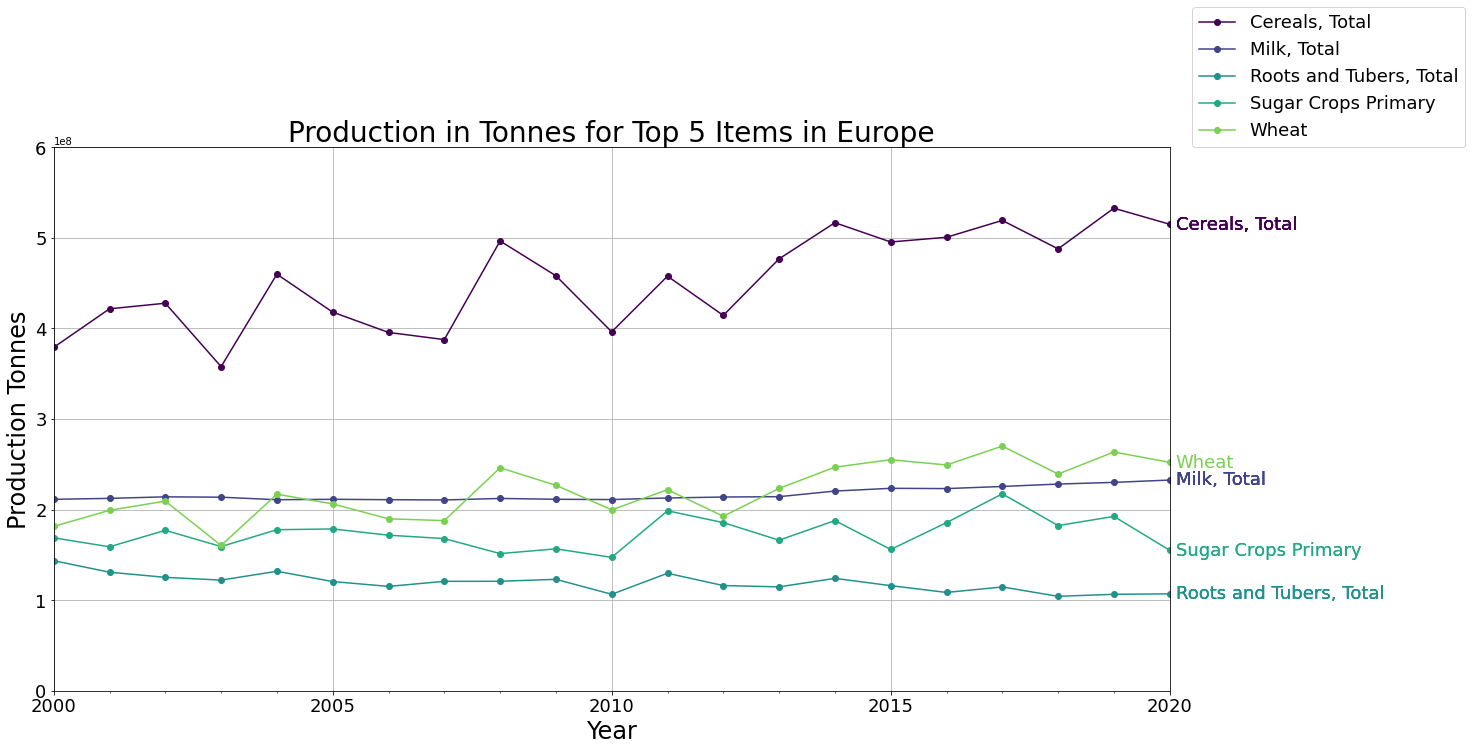

In [27]:
# plot percentage of used area for harvesting
fig, ax = plt.subplots(figsize=(20,10))
for name, group in production_commodities.groupby('Item'):
    group.plot(x='Year', y='Production_Europe', ax= ax, label=name, grid= True, marker='o', color= colors[name], )
    ax.set_ylim(bottom=0, top=600000000)
    ax.tick_params(axis = 'both', labelsize = 18)
    
    for line, name in zip(ax.lines, commodities):
        y = line.get_ydata()[-1]
        ax.annotate(name, xy=(1, y), xytext=(6, 0),
                  color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                  textcoords="offset points", size=18, va="center")

#legend position
#labelLines(plt.gca().get_lines())
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0, fontsize= 18)
plt.title('Production in Tonnes for Top 5 Items in Europe', fontsize=28)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Production Tonnes', fontsize=24)

In [31]:
production_wheat= production_commodities.loc[production_commodities["Item"]=="Wheat"]

# linear regression mit polyfit 

In [32]:
x1 = np.arange((production_wheat['Year'].size))# convert time to numbers
fit = np.polyfit(x1, production_wheat['Production_Europe'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1])) 

Slope : 3835851.502597405
Intercept : 182517886.6406926


In [33]:
'''
for i in range (5):
    item= "Wheat"
    year= 2020+i+1
    year2= pd.to_datetime(year, format= '%Y')
    print(year2)
    prediction = fit_function(production_wheat['Year'].size + i+1)
    print(prediction)
    new_row = {'Item': item,'Year':year2,'Production_Europe':prediction}
    print(new_row)
    production_wheat= production_wheat.append(new_row, ignore_index=True)
'''
print("forcast values for polyfit reggression")

forcast values for polyfit reggression


In [34]:
#new forcast values
x2= np.arange((production_wheat['Year'].size))
x2


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

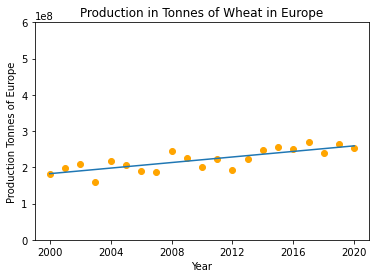

In [35]:
#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)

#Linear regression plot
plt.plot(production_wheat['Year'], fit_function(x1))
#Time series data plot
plt.scatter(production_wheat['Year'], production_wheat['Production_Europe'], color= "orange")
plt.ylim(bottom=0, top=600000000)

plt.xlabel('Year')
plt.ylabel('Production Tonnes of Europe')
plt.title('Production in Tonnes of Wheat in Europe')
plt.show()

# Linear reggression with sklearn 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

In [37]:
#predict values
date_21= "2021"
date_22= "2022"
date1 = pd.to_datetime(date_21)
date2 = pd.to_datetime(date_22)
date21= dt.date.toordinal(date1)
date22= dt.date.toordinal(date2)
pred_data= {'Year':  ['2021', '2022'],'date_or': [date21, date22]}
pred_data = pd.DataFrame(pred_data)
pred_data['Year']= pd.to_datetime(pred_data['Year'], format= '%Y')
pred_data= pred_data.set_index('Year')

In [70]:
# function to generate linear regresion & plots

def plot_linear_reg (data_original, commudi_list, pred_data):
    fig, ax = plt.subplots(3, 2, sharey=True, figsize=(17,10)) 
    j= 0
    k= 0
    #store x-values for prediction
    X_new= pred_data[['date_or']] 
    pred_data= pred_data.reset_index()
    #print (j,k)
    for i in range (len(commudi_list)):        
        commudi= commudi_list[i]
        dataset= data_original.loc[data_original["Item"]==commudi]
        dataset['date_or']= dataset['Year'].map(dt.datetime.toordinal)
        #dataset['Year']= pd.to_datetime(dataset['Year'])
        dataset =  dataset.set_index('Year')
        
        # prepare data
        X = dataset[['date_or']]
        y = dataset[['Production_Europe']]
        
        #split data
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

        regressor = LinearRegression()
        regressor.fit(X_train,y_train) 

        # predicting the test set results
        y_pred = regressor.predict(X_test) 
        #print(y_pred)

        #print(y_test)
        
        #predict values for 2021 and 2022
        y_pred_new = regressor.predict(X_new)
        print(commudi, "predicted values: " , y_pred_new)
        
        #reset index for plotting
        X_test_years= X_test.reset_index()
        X_train_years = X_train.reset_index()

        #add predicted values
        pred_data['Production_Europe']= y_pred_new
       
        

        ax[j, k].scatter(X_test_years['Year'], y_test, color='tab:red', label= 'Test-data') 
        ax[j, k].scatter(X_train_years['Year'], y_train, color='tab:red', label= 'Train-data')
        ax[j, k].scatter(pred_data['Year'], pred_data['Production_Europe'], color ='tab:orange', label= 'Predicted-data')
        ax[j, k].plot(X_train_years['Year'], regressor.predict(X_train), color='tab:blue', label='Linear Model') # plotting the regression line
        ax[j, k].set_title(commudi,fontsize=22)
        ax[j, k].set_xlabel ("Year",fontsize=18)
        ax[j, k].set_ylabel ("Production in [t]",fontsize=18)
        ax[j, k].tick_params(axis = 'both', labelsize = 12)
        ax[j, k].grid()

        
        #l = ax[j, k].legend([(p1, p2)], ['Two keys'], numpoints=1,
             # handler_map={tuple: HandlerTuple(ndivide=None)})

        #change ax
        if (k >=1):
            k= 0
            j= j+1
        else:
            k= k+1
        print(commudi)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print(dataset.describe())
    
    blue_line = mlines.Line2D([], [], color='tab:blue', label='Linear Model')
    r = mpatches.Circle((0.5, 0.5), 0.25, facecolor="tab:red",
                    edgecolor="tab:red", linewidth=1, label= 'Original Data')
    o = mpatches.Circle((0.5, 0.5), 0.25, facecolor="tab:orange",
                    edgecolor="tab:orange", linewidth=1, label= 'Predicted Data')
    
    plt.legend(handles=[blue_line, r,o ],fontsize=16)
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.6)
  
    fig.suptitle('Linear Regression of Production of Top 5 Commodities Over Time', fontsize=28)
    plt.show()
    plt.savefig('linear Regression.png')

        

<ipython-input-70-f86825d2c8ee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date_or']= dataset['Year'].map(dt.datetime.toordinal)
<ipython-input-70-f86825d2c8ee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date_or']= dataset['Year'].map(dt.datetime.toordinal)
<ipython-input-70-f86825d2c8ee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Cereals, Total predicted values:  [[5.27804826e+08]
 [5.34976800e+08]]
Cereals, Total
Mean Absolute Error: 29252709.07946396
Mean Squared Error: 1373577726121117.8
Root Mean Squared Error: 37061809.53651775
       Production_Europe        date_or
count       2.100000e+01      21.000000
mean        4.530494e+08  733772.857143
std         5.296744e+07    2266.296523
min         3.578014e+08  730120.000000
25%         4.143285e+08  731947.000000
50%         4.581198e+08  733773.000000
75%         4.964811e+08  735599.000000
max         5.326518e+08  737425.000000
Milk, Total predicted values:  [[2.28373831e+08]
 [2.29357745e+08]]
Milk, Total
Mean Absolute Error: 4516796.9748290945
Mean Squared Error: 23699213343362.8
Root Mean Squared Error: 4868183.782825254
       Production_Europe        date_or
count       2.100000e+01      21.000000
mean        2.168884e+08  733772.857143
std         7.230354e+06    2266.296523
min         2.106288e+08  730120.000000
25%         2.113651e+08  731947.

<ipython-input-70-f86825d2c8ee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date_or']= dataset['Year'].map(dt.datetime.toordinal)
<ipython-input-70-f86825d2c8ee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date_or']= dataset['Year'].map(dt.datetime.toordinal)


Wheat
Mean Absolute Error: 14888559.497172628
Mean Squared Error: 317303985350925.7
Root Mean Squared Error: 17813028.52832515
       Production_Europe        date_or
count       2.100000e+01      21.000000
mean        2.208764e+08  733772.857143
std         3.019471e+07    2266.296523
min         1.604093e+08  730120.000000
25%         1.992152e+08  731947.000000
50%         2.219549e+08  733773.000000
75%         2.468645e+08  735599.000000
max         2.701032e+08  737425.000000


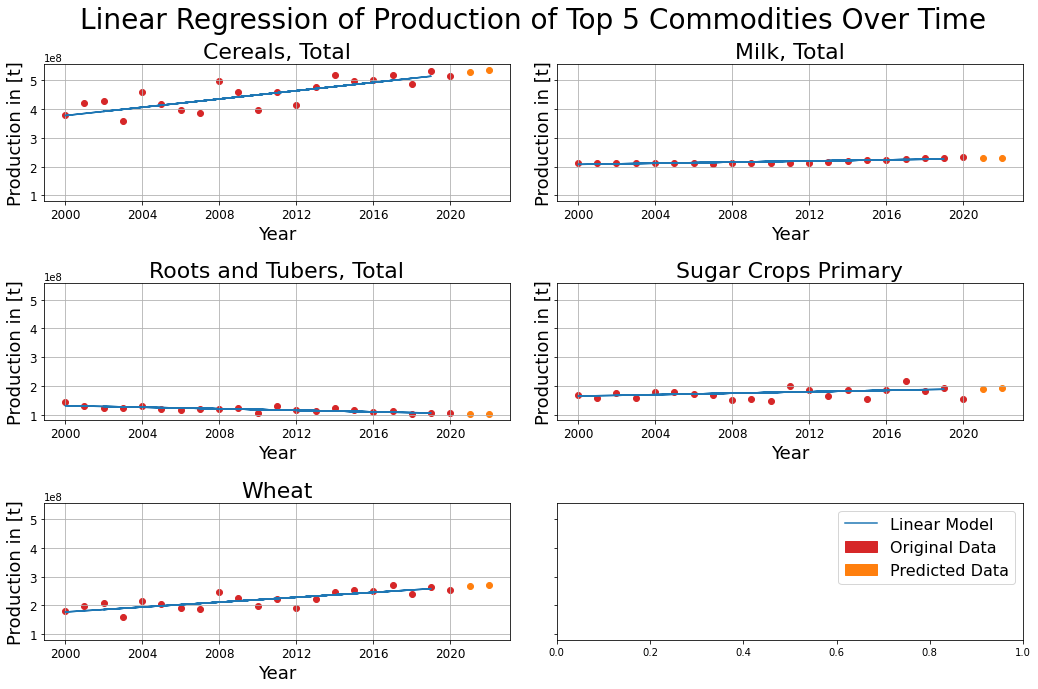

<Figure size 432x288 with 0 Axes>

In [71]:
plot_linear_reg(production_commodities, commodities,pred_data)

# NOT NEEDED ANYMORE

In [230]:
dataset=production_wheat.copy()
dataset['date_or']= dataset['Year'].map(dt.datetime.toordinal)
dataset['Year']= pd.to_datetime(dataset['Year'])
dataset =  dataset.set_index('Year')

,Item,Production_Europe,date_or
Year,,,
2000-01-01,Wheat,181434043.0,730120
2001-01-01,Wheat,199215239.0,730486
2002-01-01,Wheat,209361967.0,730851
2003-01-01,Wheat,160409344.0,731216
2004-01-01,Wheat,216995408.0,731581
2005-01-01,Wheat,206309719.0,731947
2006-01-01,Wheat,189838618.0,732312
2007-01-01,Wheat,187837714.0,732677
2008-01-01,Wheat,246184243.0,733042


[[2.11394983e+08]
 [2.32666601e+08]
 [2.62425908e+08]
 [1.81635676e+08]
 [2.24155625e+08]
 [2.19905959e+08]
 [2.36916267e+08]]
            Production_Europe
Year                         
2008-01-01        246184243.0
2013-01-01        223411207.0
2020-01-01        252143243.0
2001-01-01        199215239.0
2011-01-01        221954860.0
2010-01-01        199741938.0
2014-01-01        246864516.0
            Production_Europe
Year                         
2018-01-01        239243278.0
2006-01-01        189838618.0
2019-01-01        263599573.0
2004-01-01        216995408.0
2002-01-01        209361967.0
2005-01-01        206309719.0
2016-01-01        249269894.0
2009-01-01        226809226.0
2007-01-01        187837714.0
2017-01-01        270103192.0
2003-01-01        160409344.0
2000-01-01        181434043.0
2015-01-01        255031087.0
2012-01-01        192646126.0
2008-01-01        246184243.0
2013-01-01        223411207.0
2020-01-01        252143243.0
2001-01-01        199215239.0
201

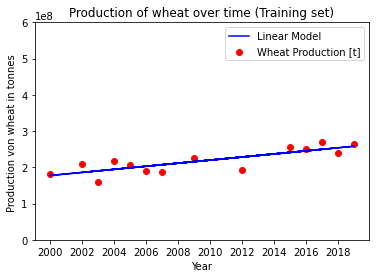

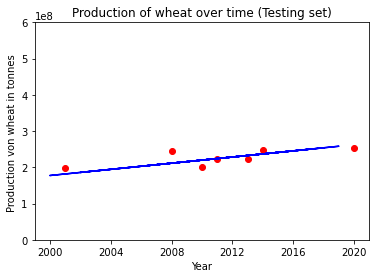

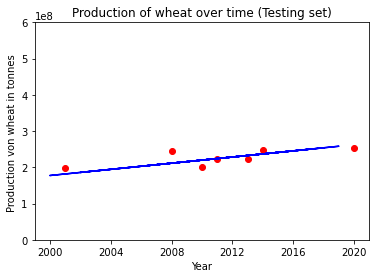

Mean Absolute Error: 14888559.497172628
Mean Squared Error: 317303985350925.7
Root Mean Squared Error: 17813028.52832515


,Production_Europe,date_ordinal,date_or
count,2.100000e+01,21.000000,21.000000
mean,2.208764e+08,733772.857143,733772.857143
std,3.019471e+07,2266.296523,2266.296523
min,1.604093e+08,730120.000000,730120.000000
25%,1.992152e+08,731947.000000,731947.000000
50%,2.219549e+08,733773.000000,733773.000000
75%,2.468645e+08,735599.000000,735599.000000
max,2.701032e+08,737425.000000,737425.000000


In [321]:

X = dataset[['date_or']]
y = dataset[['Production_Europe']]

#predict values
#X_new= data_new[['date_or']] 
#for ploting all values including prediction
#X_all = X.append(X_new)


#hier kommt der Fehler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
 
# predicting the test set results
y_pred = regressor.predict(X_test) 
print(y_pred)
 
print(y_test)


#get all predicted values
y_all = y_train.append(y_test)
#y_all = y_train.append(y_pred_new)
print(y_all)

X_test_years= X_test.reset_index()
X_train_years = X_train.reset_index()

plt.scatter(X_train_years['Year'], y_train, color='red', label='Wheat Production [t]') # plotting the observation line
plt.plot(X_train_years['Year'], regressor.predict(X_train), color='blue', label='Linear Model') # plotting the regression line
plt.title("Production of wheat over time (Training set)") # stating the title of the graph
plt.ylim(bottom=0, top=600000000)
  
plt.xlabel("Year") # adding the name of x-axis
plt.ylabel("Production von wheat in tonnes ") # adding the name of y-axis
plt.legend()
plt.show() # specifies end of graph
 

#plot for the TEST


plt.scatter(X_test_years['Year'], y_test, color='red') 
plt.plot(X_train_years['Year'], regressor.predict(X_train), color='blue', label='Linear Model') # plotting the regression line
plt.title("Production of wheat over time (Testing set)")
plt.ylim(bottom=0, top=600000000)
  
plt.xlabel("Year") 
plt.ylabel("Production von wheat in tonnes ") 
plt.show() 


plt.scatter(X_test_years['Year'], y_test, color='red') 
plt.plot(X_train_years['Year'], regressor.predict(X_train), color='blue', label='Linear Model') # plotting the regression line
plt.title("Production of wheat over time (Testing set)")
plt.ylim(bottom=0, top=600000000)
  
plt.xlabel("Year") 
plt.ylabel("Production von wheat in tonnes ") 
plt.show() 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#get mean value 
df.describe()

# predict values for 2021 and 2022



In [307]:
#predict values
date_21= "2021"
date_22= "2022"
date1 = pd.to_datetime(date_21)
date2 = pd.to_datetime(date_22)
date21= dt.date.toordinal(date1)
date22= dt.date.toordinal(date2)
data_new = {'Year':  ['2021', '2022'],'date_or': [date21, date22]}
data_new = pd.DataFrame(data_new)
data_new['Year']= pd.to_datetime(data_new['Year'], format= '%Y')
data_new= data_new.set_index('Year')
X_new= data_new[['date_or']] 
#predict y values for X_new
y_pred_new = regressor.predict(X_new)
data_new['Production_Europe']= y_pred_new
data_new= data_new.reset_index()
#data_new

,Year,date_or,Production_Europe
0,2021-01-01,737791,2.666872e+08
1,2022-01-01,738156,2.709369e+08


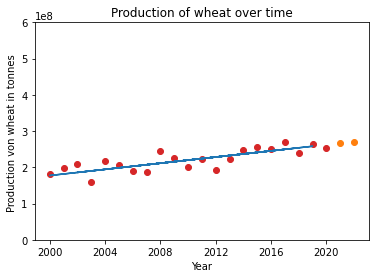

In [303]:
plt.scatter(X_test_years['Year'], y_test, color='tab:red') 
plt.scatter(X_train_years['Year'], y_train, color='tab:red')
plt.scatter(data_new['Year'], data_new['Production_Europe'], color ='tab:orange', label= 'Predicted values')
plt.plot(X_train_years['Year'], regressor.predict(X_train), color='tab:blue', label='Linear Model') # plotting the regression line
plt.title("Production of wheat over time")
plt.ylim(bottom=0, top=600000000)
#plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
  
plt.xlabel("Year") 
plt.ylabel("Production von wheat in tonnes ") 
plt.show() 

In [197]:
dataset = production_wheat.copy()

In [198]:
X = np.arange(production_wheat['Year'].size) 

x3 = production_wheat.copy()
x3['Year']= pd.to_datetime(x3['Year'])



y = production_wheat["Production_Europe"].values 
print(X)
print(y)
x = X.reshape(-1, 1); 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[1.81434043e+08 1.99215239e+08 2.09361967e+08 1.60409344e+08
 2.16995408e+08 2.06309719e+08 1.89838618e+08 1.87837714e+08
 2.46184243e+08 2.26809226e+08 1.99741938e+08 2.21954860e+08
 1.92646126e+08 2.23411207e+08 2.46864516e+08 2.55031087e+08
 2.49269894e+08 2.70103192e+08 2.39243278e+08 2.63599573e+08
 2.52143243e+08]


In [199]:


#pip install seaborn
import seaborn


In [200]:
df = production_wheat.copy()

<ipython-input-212-dd456a68850e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


[Text(730000.0, 0, '1999-09-03'),
 Text(731000.0, 0, '2002-05-30'),
 Text(732000.0, 0, '2005-02-23'),
 Text(733000.0, 0, '2007-11-20'),
 Text(734000.0, 0, '2010-08-16'),
 Text(735000.0, 0, '2013-05-12'),
 Text(736000.0, 0, '2016-02-06'),
 Text(737000.0, 0, '2018-11-02'),
 Text(738000.0, 0, '2021-07-29')]

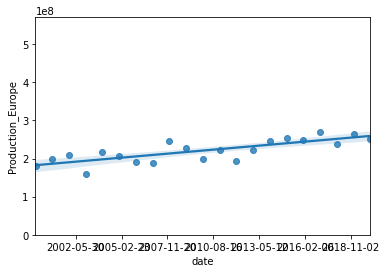

In [212]:
df = production_wheat.copy()
df['date_ordinal'] = pd.to_datetime(df['Year']).apply(lambda date: date.toordinal())

ax = seaborn.regplot(
    data=df,
    x='date_ordinal',
    y='Production_Europe',
)

# Tighten up the axes for prettiness
ax.set_xlim(df['date_ordinal'].min() - 1, df['date_ordinal'].max() + 1)
ax.set_ylim(0, df['Production_Europe'].max() + 300000000)


ax.set_xlabel('date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)